In [156]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
from PIL import Image

# Ex. 1) Przekształcenie sfery w elipsoidę

### 1.
Korzystając z równania parametrycznego:

$ \textbf{v} = \begin{bmatrix}cos(s)sin(t) \\ sin(s)sin(t) \\ cos(t)\end{bmatrix}  $

Narysujemy sferę jednostkową w 3D dla:

$s \in [0, 2\pi], t \in [0, \pi]$

Zdefiniujemy w pogramie dane zadane nam w poleceniu

In [157]:
s_range = [0, 2*np.pi]
t_range = [0, np.pi]
v = [lambda s, t : np.cos(s)*np.sin(t),
     lambda s, t : np.sin(s)*np.sin(t),
     lambda s, t : np.cos(t)]

Zdefiniujemy funkcję, która przyjmując przedział $s$, $t$ oraz wektor funkcji $v$, narysuje nam wykres oraz zwróci zbiór punktów należących do sfery.

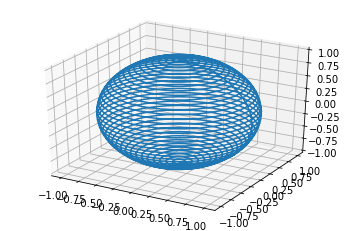

In [158]:
def plot_3d(x, y, z):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    plt.show()


def draw_3d_sphere(s_range, t_range, v, n = 40):
    s = np.linspace(s_range[0], s_range[1], n)
    t = np.linspace(t_range[0], t_range[1], n)
    
    S, T = np.meshgrid(s, t)
    
    x = v[0](S, T).flatten()
    y = v[1](S, T).flatten()
    z = v[2](S, T).flatten()
    
    plot_3d(x,y,z)
    
    return x, y, z

x, y, z = draw_3d_sphere(s_range, t_range, v)

***

*Jak widać w wyniku dostaliśmy sferę o promieniu $R = 1$ i środku w punkcie $(0,0,0)$*


---
### 2.

Następnie wygenerujemy 3 różne macierze $A_1, A_2, A_3 (A_i \in \mathbb{R}^{3x3})$

In [159]:
A1 = np.random.rand(3, 3)
A2 = np.random.rand(3, 3)
A3 = np.random.rand(3, 3)

Za ich pomocą przekształcimy sferę w elipsoidę i przedstawimy wizualizację uzyskanego wyniku na wykresie.

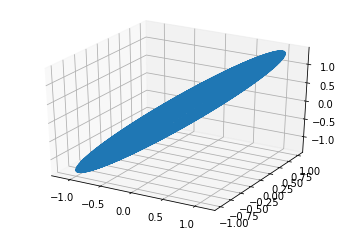

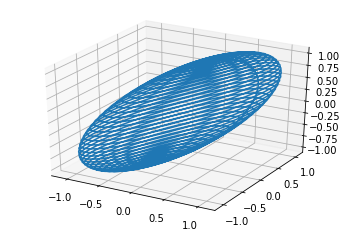

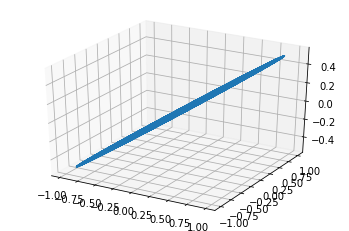

In [160]:
S = np.row_stack([x, y, z])

E_1 = A1 @ S
E_2 = A2 @ S
E_3 = A3 @ S

plot_3d(E_1[0], E_1[1], E_1[2])
plot_3d(E_2[0], E_2[1], E_2[2])
plot_3d(E_3[0], E_3[1], E_3[2])

---
### 3.

Teraz dokonamy rozkładu wartości osobliwych SVD w każdej macierzy <strong>$A_i$</strong>.\
Użyjemy w tym celu funkcji `linalg.svd` z biblioteki `numpy`

In [161]:
U1, sigma1, V1 = np.linalg.svd(A1)
U2, sigma2, V2 = np.linalg.svd(A2)
U3, sigma3, V3 = np.linalg.svd(A3)

Teraz na wykresie elipsoidy odpowiadającej każdej macierzy dodamy wizualizację jej półosi wyznaczonych za pomocą SVD

Przygotujemy zmienne na wyrysowanie półosi:

In [162]:
x_start, y_start, z_start = [[0] * 3] * 3
x_end = [0] * 3
y_end = [0] * 3
z_end = [0] * 3

### $A_1$

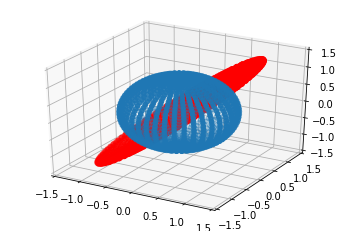

In [163]:
for i, s1 in enumerate(np.diag(sigma1)):
    a = np.dot(U1, s1)
    x_end[i] = a[0]
    y_end[i] = a[1]
    z_end[i] = a[2]
quiver1 = [x_start, y_start, z_start, x_end, y_end, z_end]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.scatter(E_1[0], E_1[1], E_1[2], color='red')
ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='red')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
plt.show()


### $A_2$

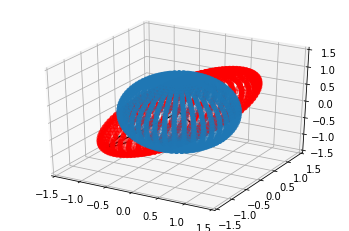

In [164]:
for i, s2 in enumerate(np.diag(sigma2)):
    a = np.dot(U2, s2)
    x_end[i] = a[0]
    y_end[i] = a[1]
    z_end[i] = a[2]
quiver2 = [x_start, y_start, z_start, x_end, y_end, z_end]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.scatter(E_2[0], E_2[1], E_2[2], color='red')
ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
plt.show()

### $A_3$

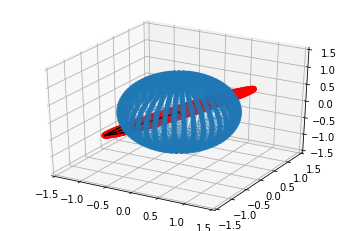

In [165]:
for i, s3 in enumerate(np.diag(sigma3)):
    a = np.dot(U3, s3)
    x_end[i] = a[0]
    y_end[i] = a[1]
    z_end[i] = a[2]
quiver2 = [x_start, y_start, z_start, x_end, y_end, z_end]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z)
ax.scatter(E_3[0], E_3[1], E_3[2], color='red')
ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
plt.show()

---
### 4.
Znajdziemy taką macierz <strong>$A_i$</strong>, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100.

In [166]:
A_4 = np.random.rand(3, 3)
U, sigma_4, V = np.linalg.svd(A_4)
# ponieważ wartości osobliwe są posortowane malejąco
while sigma_4[0] / sigma_4[-1] < 100:
    A_4 = np.random.rand(3, 3)
    U, sigma_4, V = np.linalg.svd(A_4)
    
A_4

array([[0.74537385, 0.39965506, 0.47730865],
       [0.6828043 , 0.55259552, 0.66996602],
       [0.71472486, 0.80491051, 0.9905154 ]])

Teraz narysujemy elipsoidę dla znalezionej macierzy

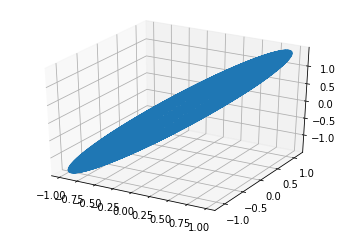

In [167]:
E_4 = A_4 @ S
plot_3d(E_4[0], E_4[1], E_4[2])

---
### 5.
Dla wybranej macierzy $A_i$ mamy teraz przedstawić wizualizację $SV_i^T$, $S\Sigma_iV_i^T$ oraz $SU_i\Sigma_iV_i^T$

gdzie

$A_i = U_i\Sigma_iV_i^T$
oraz
$S$ <- sfera z punktu 1.

Naszą wybraną macierzą będzie $A_1$

In [168]:
# Make SVD
U, sigma, V = np.linalg.svd(A1)

$SV_i^T$

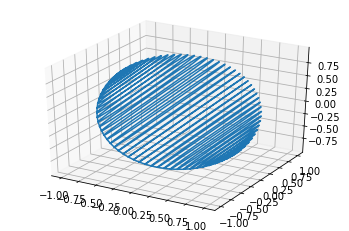

In [169]:
elipsoid = V.T @ S

plot_3d(elipsoid[0], elipsoid[1], elipsoid[2])

$S\Sigma_iV_i^T$

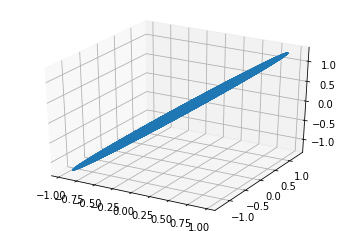

In [170]:
elipsoid = S.T * sigma @ V
elipsoid = elipsoid.T

plot_3d(elipsoid[0], elipsoid[1], elipsoid[2])

$SU_i\Sigma_iV_i^T$

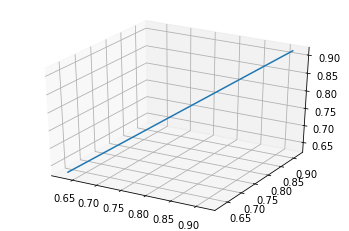

In [171]:
elipsoid = S.T @ U * sigma @ V
SUSigmaV_T = elipsoid.T

plot_3d(elipsoid[0], elipsoid[1], elipsoid[2])

# Ex. 1) Kompresja obrazu

### 1.
Przygotujemy zdjęcie 512 x 512 pikseli

<img src="image.png">

---
### 1.
Wczytamy obraz do programu i następnie obliczymy SVD macierzy pikseli <b>$I$</b> (dla każdego koloru osobno)

In [172]:
matrix = np.asarray(imageio.imread('image.png'))

SVD_R = np.linalg.svd(matrix[:,:,0] , full_matrices=False)
SVD_G = np.linalg.svd(matrix[:,:,1] , full_matrices=False)
SVD_B = np.linalg.svd(matrix[:,:,2] , full_matrices=False)

Dla $k \in [32, 64, 96, \dots, 512]$ pierwszy wartości osobliwych dokonamy przybliżenia tej macierzy za pomocą `low rank approximation`. W ten sposób uzyskamy kompresję obrazu wyjściowego.

In [173]:
def low_rank_approximation(SVD, k):
    U, S, V = SVD
    Uk = np.matrix(U[:, :k])
    Sk = np.diag(S[:k])
    Vk = np.matrix(V[:k, :])
    result = Uk * Sk * Vk
    return result


def get_quality(matrix, approx_matrix):
    diff_matrix = np.subtract(matrix, approx_matrix)
    quality = np.linalg.norm(diff_matrix)
    return quality


ks = range(32, 513, 32)
qualities = []
images = []

for k in ks:
    R_appr = low_rank_approximation(SVD_R, k)
    G_appr = low_rank_approximation(SVD_G, k)
    B_appr = low_rank_approximation(SVD_B, k)
    approx_matrix = np.zeros((512,512,3), 'uint8')
    approx_matrix[..., 0] = R_appr
    approx_matrix[..., 1] = G_appr
    approx_matrix[..., 2] = B_appr
    quality = get_quality(matrix, approx_matrix)
    qualities.append(quality)
    compressed_image = Image.fromarray(np.uint8(approx_matrix), "RGB")
    images.append(compressed_image)
    filename = "lenna_image_" + str(k) + ".jpg"
    compressed_image.save(filename)

---
### 3.
Zaprezentujemy na wykresie wadliwość kompresji - różnicę miedzy oryginalną wersją a kompresją (oś pionowa) w zależności od liczby k (oś pozioma)

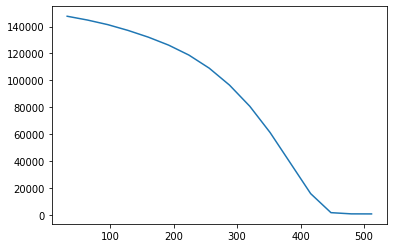

In [174]:
plt.plot(ks, qualities)
plt.show()

Teraz utworzymy plik `lennas.gif`, który zobrazuje nam, jak zmienia się obraz w zależności od liczby k

In [175]:
images[0].save("lennas.gif", save_all=True, append_images=images[1:], duration=256, loop=0)

<img src="lennas.gif" />